In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [5]:
data=pd.read_csv("TelcoCustomerChurn.csv")

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
data.shape

(7043, 20)

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
ulis=["MultipleLines","InternetService","Contract","PaymentMethod"]
for i in ulis:
    print(data[i].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [7]:
data['Churn'].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
data.drop(["customerID"],axis=1,inplace=True)


In [7]:
data.to_csv('TelcoCustomerChurn.csv', index=False)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


C:\Users\Shubh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


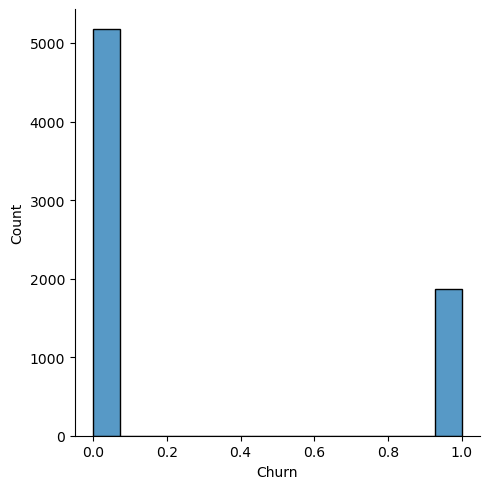

In [9]:
sns.displot(x='Churn',data=data)

## Creating a new dataset

In [18]:
Ddata=data.drop(['Churn'],axis=1)
Ddata.to_csv("clustering.csv", index=False)

### Smote

In [10]:
unique_values, counts = np.unique(data['Churn'], return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 5174
1: 1869


In [11]:
data['TotalCharges'].replace(' ', '0', inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharge'] = data['TotalCharges'].astype(int)

In [12]:
x=data.drop(['Churn'],axis=1).values
y=data['Churn'].values

In [13]:

ordi=OrdinalEncoder()

os=OneHotEncoder(drop="first")

sc=StandardScaler()

In [14]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
        ("OneHot",os,[0,2,3,5,6,8,9,10,11,12,13,15]),
        ('ordi',ordi,[7,14,16]),
        ("stnader",sc,[4,17,18])
    ],remainder='passthrough')
x=trf.fit_transform(x)

In [15]:
from imblearn.over_sampling import SMOTENC
categorical_features_indices = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20]
# Create a SMOTE object
smote = SMOTENC(sampling_strategy='auto', categorical_features=categorical_features_indices, random_state=42)

x_sm, y_sm = smote.fit_resample(x, y)

!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn


In [16]:
unique_values, counts = np.unique(y_sm, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 5174
1: 5174


In [31]:
column_names = data.columns.tolist()
column_names.remove('Churn')
len(column_names)

20

In [30]:
len(x[0])

27

In [32]:
x_sm_df = pd.DataFrame(x_sm)  
y_sm_df = pd.DataFrame(y_sm, columns=['Churn']) 
oversampled_df = pd.concat([x_sm_df, y_sm_df], axis=1)

In [33]:
oversampled_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Churn
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2.0,-1.277445,-1.160323,-0.992611,0.0,29.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.066327,-0.259629,-0.172165,0.0,1889.0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,3.0,-1.236724,-0.36266,-0.958066,0.0,108.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.514251,-0.746535,-0.193672,0.0,1840.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,-1.236724,0.197365,-0.938874,0.0,151.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,2.0,-1.155283,0.451146,-0.865623,0.0,317.26267,1
10344,1.0,0.0,0.0,1.0,0.232721,0.0,0.0,0.0,0.0,0.0,...,1.0,0.767279,0.0,2.232721,-1.227248,-0.066981,-0.947791,0.767279,130.767279,1
10345,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.926666,0.0,0.0,2.926666,-1.02715,-0.209853,-0.822254,0.0,415.073334,1
10346,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.483691,1.516309,0.0,2.0,-1.110578,-0.432692,-0.933048,0.516309,164.483691,1


In [34]:
oversampled_df.to_csv("oversampled_df.csv", index=False)